In [517]:
import unicodecsv    
#  used this module to open csv and use Python

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader= unicodecsv.DictReader(f)
        return list(reader)
    
no_shows = read_csv('noshowappointments.csv')

print (no_shows[0])

OrderedDict([('PatientId', '29872499824296'), ('AppointmentID', '5642903'), ('Gender', 'F'), ('ScheduledDay', '2016-04-29T18:38:08Z'), ('AppointmentDay', '2016-04-29T00:00:00Z'), ('Age', '62'), ('Neighbourhood', 'JARDIM DA PENHA'), ('Scholarship', '0'), ('Hipertension', '1'), ('Diabetes', '0'), ('Alcoholism', '0'), ('Handcap', '0'), ('SMS_received', '0'), ('No-show', 'No')])


In [333]:
import numpy as np
import pandas as pd


no_show = pd.read_csv('noshowappointments.csv')
# used this to open csv and create data structures 

no_show.head(5)
# wanted to see small sample of data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [334]:
# renaming columns that were mis-spelled
# inplace = True means the data is renamed in its place and does not return a copy of the object renamed

no_show.rename(columns = {'Neighbourhood' : 'Neighborhood',
                          'Hipertension': 'Hypertension',
                          'Handcap': 'Handicap'}, inplace = True)

print(no_show.columns)
# checking that this function to manipulate and change column names worked

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighborhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')


In [522]:
no_show['Age'].unique()
# looking for errors and NaNs (not a number)

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 100,  99], dtype=int64)

In [523]:
no_show['Age'].sort_values(ascending= False)
# Using built-in pandas functions to make sure ages in table make sense and sorting them to identify any major outliers

90372     102
58014     102
79272     100
92084     100
79270     100
108506    100
97647      99
69927      98
983        98
46627      98
87282      98
969        98
46802      98
38817      97
48629      97
86781      97
24127      97
30034      97
74224      97
18317      97
74426      97
106170     97
66615      97
96831      97
36941      96
49081      96
87279      96
96052      96
9437       96
42991      96
         ... 
92183       0
92186       0
50451       0
82801       0
92211       0
82740       0
38524       0
82805       0
92213       0
50386       0
38525       0
107385      0
82798       0
50485       0
38461       0
65415       0
65414       0
50525       0
97363       0
74451       0
101794      0
101785      0
97386       0
65400       0
65398       0
65397       0
82746       0
92122       0
65376       0
101552      0
Name: Age, Length: 110521, dtype: int64

In [336]:
no_show = no_show[(no_show.Age >=0) & (no_show.Age <=102)]
#omit outliers (-1 and 115)

In [335]:
no_show['No-show']=no_show['No-show'].str.replace('No' , '0')
no_show['No-show']=no_show['No-show'].str.replace('Yes' , '1')
no_show['No-show']=no_show['No-show'].astype(int)


no_show['No-show'].head(5)

# converting no-show column data into integers, replacing No with a 0 and Yes with a 1
# ran this to see if data was converted to int type

0    0
1    0
2    0
3    0
4    0
Name: No-show, dtype: int32

In [337]:
no_show['Showed'] = (no_show['No-show'] == 0)
no_show.Showed = no_show.Showed.astype(int)

no_show['Showed'].sum()

# creating a new column to reflect those who did show for their visit

88205

In [338]:
no_show.dtypes
# checking Series types following changes above

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighborhood       object
Scholarship         int64
Hypertension        int64
Diabetes            int64
Alcoholism          int64
Handicap            int64
SMS_received        int64
No-show             int32
Showed              int32
dtype: object

In [451]:
from datetime import datetime 
from datetime import time

In [488]:
no_show['ScheduledDay']=pd.to_datetime(no_show['ScheduledDay'],format='%Y-%m-%d')
no_show['AppointmentDay']=pd.to_datetime(no_show['AppointmentDay'], format = '%Y-%m-%d')

no_show['waitinDays']= no_show['AppointmentDay'] - no_show['ScheduledDay']

# checking if any values in AppointmentDay column is unique from the rest
# also creating a new column (waitinDays) with information from two other columns to provide info on how many days patients had between scheduled visit and actual visit

In [340]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,0,'Appointment Weeks')

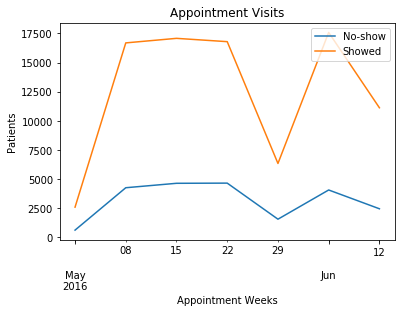

In [516]:
groupedapptshow = no_show[['AppointmentDay','No-show', 'Showed']]
groupedapptshow.head()
groupedapptshow = groupedapptshow.set_index('AppointmentDay')
groupedapptshow.head()
groupedapptshow.resample('w').apply(sum)
# appointment day data in [ns]. Wanted to convert this to weeks to make it easier to analyze when plotted

groupedapptshow_plot= groupedapptshow.resample('w').apply(sum).plot(title="Appointment Visits")
groupedapptshow_plot.legend(["No-show","Showed"], loc=1,ncol=1)
groupedapptshow_plot.set_ylabel('Patients')
groupedapptshow_plot.set_xlabel('Appointment Weeks')

In [290]:
total_num_pts = len(no_show)

def percentages(columns, dataframe):
    if columns == 'No-show':
        no, yes = no_show[columns].value_counts()
        print('No Show Percentage: {}%'.format(yes/total_num_pts*100))
        print('Percent Patients that Made Visit : {}%'.format(no/total_num_pts*100))
    else:
        no, yes = no_show[columns].value_counts()
        print('% patients that DONT have this - {} : {}%'.format(columns, no/total_num_pts*100))
        print('% patients WITH this - {} : {}%'.format(columns, yes/total_num_pts*100))
    

columns ={'No-show', 'Hypertension', 'Diabetes', 'Scholarship', 'Alcoholism'}

for titles in columns:
    percentages(titles, no_show)


# using for loop to gather similar information for the above columns    

% patients that DONT have this - Scholarship : 90.17290831606662%
% patients WITH this - Scholarship : 9.82709168393337%
% patients that DONT have this - Hypertension : 80.27524180924893%
% patients WITH this - Hypertension : 19.72475819075108%
No Show Percentage: 20.19163778829363%
Percent Patients that Made Visit : 79.80836221170637%
% patients that DONT have this - Diabetes : 92.81313053627818%
% patients WITH this - Diabetes : 7.186869463721826%
% patients that DONT have this - Alcoholism : 96.95985378344388%
% patients WITH this - Alcoholism : 3.0401462165561295%


In [291]:
no_show.groupby('No-show').apply(len)/len(no_show)

# nearly 80% people made their appointments and showing a quicker way to get information also collected above for just no-show column

No-show
0    0.798084
1    0.201916
dtype: float64

Text(0,0.5,'No-shows')

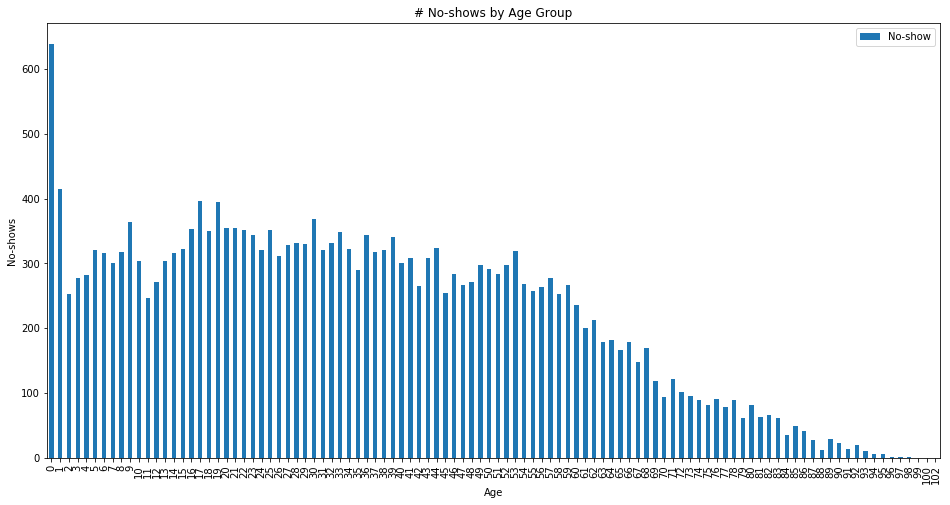

In [379]:
compare_noshow_age = no_show[['Age', 'No-show']]
noshow_vs_age = compare_noshow_age.groupby('Age').sum()


noshow_vs_age.head(10)

plot_age_shows=noshow_vs_age.plot(kind='bar', title="# No-shows by Age Group", figsize=(16,8))
plot_age_shows.set_xlabel("Age")
plot_age_shows.set_ylabel("No-shows")



In [146]:
pd.crosstab(no_show["Age"],no_show["No-show"],margins=True).head(10)
# another way to visualize information
# this allows shows that even though no-show numbers high for younger ages, so was their total for that age

No-show,0,1,All
Age,,,
0,2900,639,3539
1,1858,415,2273
2,1366,252,1618
3,1236,277,1513
4,1017,282,1299
5,1169,320,1489
6,1205,316,1521
7,1126,301,1427
8,1106,318,1424


Text(0,0.5,'Made Visit')

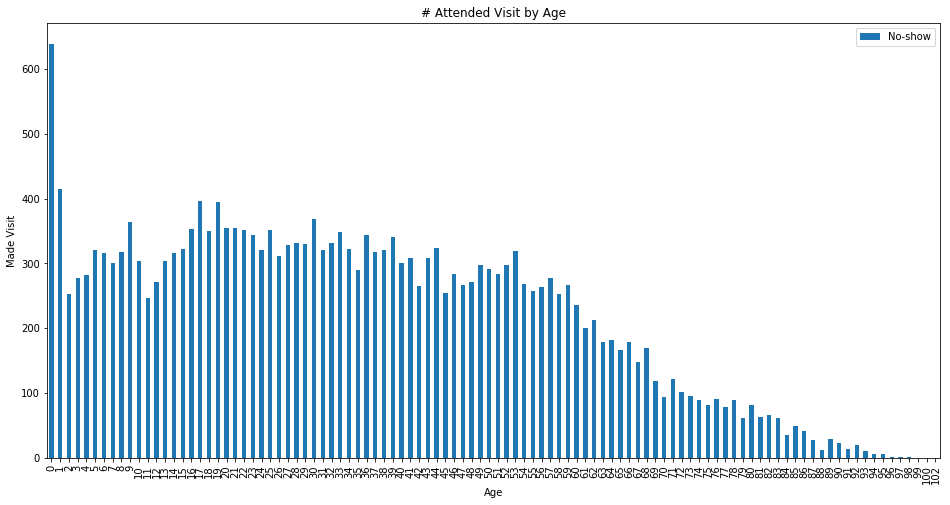

In [382]:
compare_showed_age = no_show[['Age', 'Showed']]
showed_vs_age = compare_showed_age.groupby('Age').sum()


showed_vs_age.head(10)

plot_age_showed=noshow_vs_age.plot(kind='bar', title="# Attended Visit by Age", figsize=(16,8))
plot_age_showed.set_xlabel("Age")
plot_age_showed.set_ylabel("Made Visit")

# graph trends similar to above which indicates that even though number of no-shows higher in younger patients, younger patients 
# also made up larger percentage of patients total

Text(0,0.5,'Ratio')

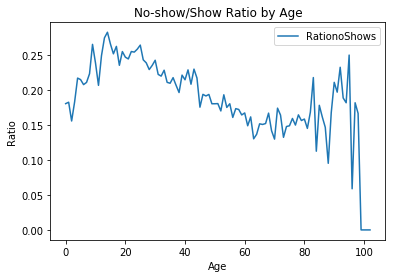

In [332]:
noshow_age = no_show.groupby('Age').sum()
noshow_age['RationoShows'] = noshow_age['No-show'] / (noshow_age['Showed'] + noshow_age['No-show'])
graph_ratio=noshow_age[['RationoShows']].plot(title="No-show/Show Ratio by Age")
graph_ratio.set_ylabel('Ratio')

# this helps to take information from both no-show and showed columns to truly see impact age plays in determining if patient will make appointment
# change of no-show do begin to decrease at about age 10 and is at lowest just after age 60

In [525]:
noshow_age['RationoShows'].std()

# small standard deviation shows low variance and possibly increased reliability with age impacting a patient making their visit or not

0.053665416685451564

In [529]:
hoods = no_show.groupby('Neighborhood').apply(len)
hoods

In [553]:
hood_show_noshow = no_show[['Neighborhood','Showed', 'No-show']]
results = hood_show_noshow.groupby(['Neighborhood']).sum()
results

,Showed,No-show
Neighborhood,,
AEROPORTO,7,1
ANDORINHAS,1740,518
ANTÔNIO HONÓRIO,221,50
ARIOVALDO FAVALESSA,220,62
BARRO VERMELHO,332,91
BELA VISTA,1523,384
BENTO FERREIRA,665,193
BOA VISTA,254,58
BONFIM,2223,550


In [154]:
num_noshowsF = (no_show['No-show'] == 1) & (no_show['Gender'] == 'F')
femalesmissedappt = num_noshowsF.sum()
femalestotal = (no_show['Gender'] == 'F').sum()
females_tot = femalestotal.sum()
pctFnoshows = femalesmissedappt / females_tot
pctFnoshows

# percent of females who missed their visits 

0.20313239593484617

In [155]:
num_noshowsM = (no_show['No-show'] == 1) & (no_show['Gender'] == 'M')
malesmissedappt = num_noshowsM.sum()
malestotal = (no_show['Gender'] == 'M')
males_tot = malestotal.sum()
pctMnoshows = malesmissedappt / males_tot
pctMnoshows

# percent of males who missed their visit

0.19968980224893371

In [429]:
total_missed = (no_show['No-show'] == 1).astype(int)
total_num_missed = total_missed.sum()

grpF = (no_show['Gender'] == 'F') & (no_show['No-show'] == 1).astype(int)
grpF.sum()

grpM = (no_show['Gender'] == 'M') & (no_show['No-show'] == 1).astype(int)
grpM.sum()

prct = grpM/total_num_missed
prct.sum()

# overall percent of no-shows who were male

0.34616418713031011

In [157]:
prct = grpF/total_num_missed
prct.sum()

# overall percent of no-shows who were female

0.65383581286968973

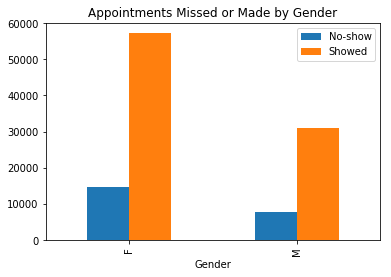

In [428]:
visit_by_gender=no_show[['Gender', 'No-show', 'Showed']]
graph_gender_visit = visit_by_gender.groupby('Gender').sum()
graph_gender_visit.plot(kind="bar", title="Appointments Missed or Made by Gender")


Text(0,0.5,'Total Patient')

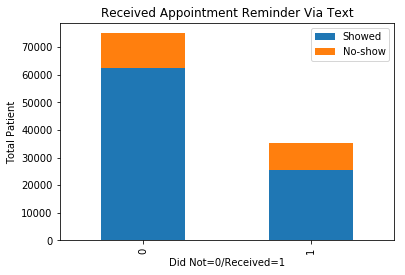

In [514]:
text_show = no_show[['SMS_received','Showed', 'No-show']]
sms = text_show.groupby('SMS_received').sum()
my_smsplot = sms.plot(kind='bar',stacked=True,title="Received Appointment Reminder Via Text")
my_smsplot.set_xlabel("Did Not=0/Received=1")
my_smsplot.set_ylabel("Total Patient")



In [552]:
no_show['waitinDays']= no_show['waitinDays'].astype('timedelta64[D]')

wait_show = no_show[['waitinDays','No-show', 'Showed']]
wait_show_group = wait_show.groupby('waitinDays').sum()
wait_show_group

,No-show,Showed
waitinDays,,
-7 days,1,0
-2 days,4,0
-1 days,1792,36769
0 days,1113,4100
1 days,1602,5123
2 days,642,2093
3 days,1231,4059
4 days,872,2405
5 days,1001,3036
